In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Question** Importer le fichier `heart_Disease.csv` dans un `dataframe`. Regarder les premières lignes, regardez les statistiques descriptives.

In [3]:
df = pd.read_csv("heart_Disease.csv")

# Observation

In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Question** Regardez l'aide sur `nunique` de pandas et afficher des informations complémentaires sur ce dataset. Les valeurs numériques sont elles toutes des valeurs continues ou des valeurs discrètes ? 

In [6]:
print(df.nunique())
print("=============")
print(df.nunique(dropna=False))
# On remarque que chol a 152 val différentes, alors que le sex ne peut dépasser 2 val.
# => mélange de val continue et discrète.

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64
age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64


Les attributs ici qui ont un nombre de valeurs supérieur à 5 sont plutôt à interpréter comme des attributs à valeurs continues et les autres des attributs catégoriels à valeurs discrètes. 

In [4]:
attrs_cont = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
attrs_cat = list(set(df.columns).difference(set(attrs_cont)))
attrs_cat.remove('target')
attrs_cat

['exang', 'sex', 'ca', 'restecg', 'thal', 'cp', 'slope', 'fbs']

**Question** Une `DataFrame` est une collection de `Series` qui sont les colonnes. On peut aussi regarder les différentes valeurs que peuvent prendre les colonnes avec `value_counts`. Regardez les différentes valeurs de chaque colonne et en particulier de la `target`.

In [8]:
print("== val age == ")
print(df.age.value_counts())
print("== val target == ")
print(df.target.value_counts())
print("== val cp == ")
print(df.cp.value_counts())

== val age == 
58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64
== val target == 
1    165
0    138
Name: target, dtype: int64
== val cp == 
0    143
2     87
1     50
3     23
Name: cp, dtype: int64


**Question** Tracer des histogrammes représentant ces comptages. Vous pouvez directement utiliser la méthode `hist`des `DataFrames` ou des `Series`.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9568f6fca0>,
      dtype=object)

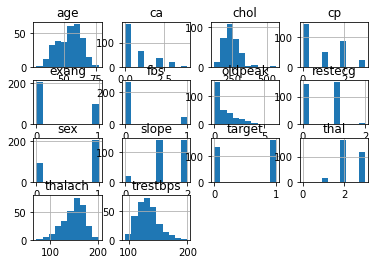

In [9]:
df.hist()

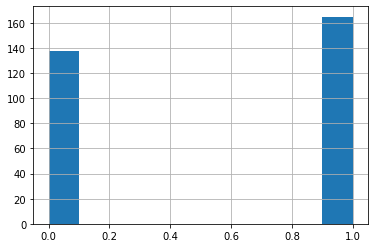

In [10]:
df.target.hist()

# Petit rappel de Pandas

In [11]:
df['age'].head()  # sélection d'une colonne

0    63
1    37
2    41
3    56
4    57
Name: age, dtype: int64

In [12]:
df[['age', 'sex']].head() # sélection de colonnes

,age,sex
0,63,1
1,37,1
2,41,0
3,56,1
4,57,0


In [13]:
df.iloc[:,0:2].head() # sélection lignes et de colonnes par les indices

,age,sex
0,63,1
1,37,1
2,41,0
3,56,1
4,57,0


In [14]:
df['sex'] == 0  # filtre, série de booléens

0      False
1      False
2       True
3      False
4       True
       ...  
298     True
299    False
300    False
301    False
302     True
Name: sex, Length: 303, dtype: bool

In [15]:
df[df['sex']==0] # application d'un filtre

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0


In [16]:
df[df['sex']==0][['age','slope']]  # cumuler un filtre et une sélection

,age,slope
2,41,2
4,57,2
6,56,1
11,48,2
14,58,2
...,...,...
289,55,1
292,58,1
296,63,1
298,57,1


# Préparation

**Question** Préparer l'échantillon pour permettre une évaluation de l'erreur.

In [5]:
X = df.drop(columns="target")
y = df.target
y = y.values.reshape(-1,1)
print(df.shape)
print(X.shape)
print(y.shape)

(303, 14)
(303, 13)
(303, 1)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
print("x_train.shape: " + str(X_train.shape) + ", y_train.shape: " + str(y_train.shape))
print("x_test.shape: " + str(X_test.shape) + ", y_test.shape: " + str(y_test.shape))

df_X_train = pd.DataFrame(X_train, columns=df.columns.drop("target"))
df_X_test = pd.DataFrame(X_test, columns=df.columns.drop("target"))
df_y_train = pd.DataFrame(y_train, columns=["target"])
df_y_test = pd.DataFrame(y_test, columns=["target"])

df_train = pd.DataFrame(np.hstack((X_train, y_train)), columns=df.columns)
df_test = pd.DataFrame(np.hstack((X_test, y_test)), columns=df.columns)

x_train.shape: (203, 13), y_train.shape: (203, 1)
x_test.shape: (100, 13), y_test.shape: (100, 1)


# Classe majoritaire

**Question** Dans un problème de classification, il faut toujours évaluer les performances d'un classifieur par rapport à quelque chose de très bête qui est la fonction constante qui prédit la classe la plus fréquente. D'après les statistiques quel serait la performance d'une telle règle sur l'échantillon complet?

*Réponse* : 

In [7]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

Rep: 
On sait qu'il y a un totale de 303 exemple. La classe majoritaire est le 1 (YES).
Si on choisit un classifieur qui retourne 1 tout le temps, on aura un taux d'erreur de :
138 / 303 = 0.45
et un taux de réussite de :
165 / 303 = 0.54

**Question** On peut trouver d'autres classeurs très bêtes comme celui-ci dans le package `dummy` de sklearn. Faites un tel classifieur qui prédit la classe majoritaire avec une des instances d'un des modules de ce package.

In [20]:
from sklearn.dummy import DummyClassifier

In [121]:
dummy_clf_mf = DummyClassifier(strategy="most_frequent")
dummy_clf_mf.fit(X, y)
dummy_clf_mf.predict(X)
dummy_clf_mf.score(X, y)

0.5445544554455446

# Naive Bayes

**Question** Lire l'explication introductive de Naive Bayes dans la [documentation de sklearn](https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes). On refait ci-dessous quelques calculs presque à la main, de façon pas très maligne, juste pour décomposer et comprendre...

**Question** Prenons les attributs `sex` et `fbs`. Calculons le nombre de fois où `sex` vaut 1 et 0 quand la cible `target` vaut 1.

In [8]:
nb_sex_1_t1 = len(df_train[(df_train.sex == 1) & (df_train.target == 1)])
nb_sex_0_t1 = len(df_train[(df_train.sex == 0) & (df_train.target == 1)])
print("nb (sex==1) && (target==1): " + str(nb_sex_1_t1))
print("nb (sex==1) && (target==1): " + str(nb_sex_0_t1))

nb (sex==1) && (target==1): 56
nb (sex==1) && (target==1): 51


**Question** Calculer les probabilités  P(sex=1|target=1), P(sex=0|target=1) nommés p1s1 et p1s0

In [9]:
nb_target_1 = len(df_train[(df_train.target == 1)])
nb_sex_1 = len(df_train[(df_train.sex == 1)])

# P(sex=1|target=1) = P(sex=1)*P(target=1|sex=1) / P(target=1)
p1s1 = ( (nb_sex_1_t1/len(df_train)) * (nb_sex_1/len(df_train))) / (nb_target_1/len(df_train))
p1s0 = ( (nb_sex_0_t1/len(df_train)) * (nb_sex_1/len(df_train))) / (nb_target_1/len(df_train))

print("nb_target_1: " + str(nb_target_1))
print("nb_sex_1: " + str(nb_sex_1))
print("p1s1: " + str(p1s1))
print("p1s0: " + str(p1s0))

nb_target_1: 107
nb_sex_1: 134
p1s1: 0.3454721237512085
p1s0: 0.3146263984162792


**Question** Prenons les attributs `sex` et `fbs`. Calculons les probabilités suivantes sur l'échantillon de train.
- P(sex|target), c'est-à-dire les 4 valeurs P(sex=1|target=1), P(sex=0|target=1), P(sex=1|target=0), P(sex=0|target=0). Nommés p1s1, p1s0, p0s1, p0s0 
- P(fbs|target) (4 valeurs). Nommés p1f1, p1f0, p0f1, p0f0 

In [11]:
nb_target_0 = len(df_train[(df_train.target == 0)])
nb_sex_0 = len(df_train[(df_train.sex == 0)])

nb_sex_1_t0 = len(df_train[(df_train.sex == 1) & (df_train.target == 0)])
nb_sex_0_t0 = len(df_train[(df_train.sex == 0) & (df_train.target == 0)])

p0s1 = ( (nb_sex_1_t0/len(df_train)) * (nb_sex_0/len(df_train))) / (nb_target_0/len(df_train))
p0s0 = ( (nb_sex_0_t0/len(df_train)) * (nb_sex_0/len(df_train))) / (nb_target_0/len(df_train))

print("nb_target_0: " + str(nb_target_0))
print("nb_sex_0: " + str(nb_sex_0))

print("nb_sex_1_t0: " + str(nb_sex_1_t0))
print("nb_sex_0_t0: " + str(nb_sex_0_t0))

print("p0s0: " + str(p0s0))
print("p0s1: " + str(p0s1))
print("total: " + str(p0s0+p0s1+p1s1+p1s0))

nb_target_0: 96
nb_sex_0: 69
nb_sex_1_t0: 78
nb_sex_0_t0: 18
p0s0: 0.06373152709359606
p0s1: 0.2761699507389162
total: 1.0


In [30]:
nb_fbs_1_t0 = len(df_train[(df_train.fbs == 1) & (df_train.target == 0)])
nb_fbs_0_t0 = len(df_train[(df_train.fbs == 0) & (df_train.target == 0)])
nb_fbs_1_t1 = len(df_train[(df_train.fbs == 1) & (df_train.target == 1)])
nb_fbs_0_t1 = len(df_train[(df_train.fbs == 0) & (df_train.target == 1)])
nb_fbs_0 = len(df_train[(df_train.fbs == 0)])
nb_fbs_1 = len(df_train[(df_train.fbs == 1)])


p1f1 = ( (nb_fbs_1_t1/len(df_train)) * (nb_fbs_1/len(df_train))) / (nb_target_1/len(df_train))
p1f0 = ( (nb_fbs_0_t1/len(df_train)) * (nb_fbs_1/len(df_train))) / (nb_target_1/len(df_train))
p0f1 = ( (nb_fbs_1_t0/len(df_train)) * (nb_fbs_0/len(df_train))) / (nb_target_0/len(df_train))
p0f0 = ( (nb_fbs_0_t0/len(df_train)) * (nb_fbs_0/len(df_train))) / (nb_target_0/len(df_train))

print("nb_fbs_1: " + str(nb_fbs_1))
print("nb_fbs_0: " + str(nb_fbs_0))
print("p1f1: " + str(p1f1))
print("p1f0: " + str(p1f0))
print("p0f1: " + str(p0f1))
print("p0f0: " + str(p0f0))
print("total: " + str(p1f1 + p1f0 + p0f1 + p0f0))

nb_fbs_1: 26
nb_fbs_0: 177
p1f1: 0.01795497444869021
p1f0: 0.11012384328529994
p0f1: 0.09990763546798032
p0f0: 0.7720135467980296
total: 1.0


**Question** Toujours sur le train, quelles sont les probabilités d'avoir la cible à 1 ou à 0 ? p1, p0

In [26]:
p0 = nb_target_0 / len(df_train)
p1 = nb_target_1 / len(df_train)

print("p1: " + str(p1))
print("p0: " + str(p0))
print("total: " + str(p1 + p0))

p1: 0.5270935960591133
p0: 0.4729064039408867
total: 1.0


**Question** Maintenant prenons le premier exemple du test et regardons les attributs `sex` et `fbs`. Avec le modèle de Naive Bayes, quelle serait la valeur de la cible qui serait prédite et pourquoi ? 

In [36]:
p1s1f1 = p1s1 * p1f1
p0s1f1 = p0s1 * p0f1
print("p1s1f1: " + str(p1s1f1))
print("p0s1f1: " + str(p0s1f1))
print("total: " + str(p0s1f1+p1s1f1))

df_test.head()

p1s1f1: 0.00620294315468769
p0s1f1: 0.02759148676563372
total: 0.03379442992032141


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,0.0,150.0,276.0,0.0,0.0,112.0,1.0,0.6,1.0,1.0,1.0,0.0
1,59.0,1.0,3.0,170.0,288.0,0.0,0.0,159.0,0.0,0.2,1.0,0.0,3.0,0.0
2,57.0,1.0,2.0,150.0,126.0,1.0,1.0,173.0,0.0,0.2,2.0,1.0,3.0,1.0
3,56.0,0.0,0.0,134.0,409.0,0.0,0.0,150.0,1.0,1.9,1.0,2.0,3.0,0.0
4,71.0,0.0,2.0,110.0,265.0,1.0,0.0,130.0,0.0,0.0,2.0,1.0,2.0,1.0


Rep:
    
```
P(T=1|sex=1,fbs=0) = P(T=1|sex=1) * P(T=1|fbs=1)
                   = p1s1 * p1f1
                   = 0.00620294315468769
P(T=0|sex=1,fbs=0) = P(T=0|sex=1) * P(T=0|fbs=1)
                   = p0s1 * p0f1
                   = 0.02759148676563372             
```

La prob d'avoir un 0 est plus grande !

*Réponse* : C'est donc 0 la valeur prédite.

**Question** Importez `CategoricalNB` et appliquez le classifeur en ne prenant en compte que les attributs `sex` et `fbs` pour retrouver ces résultats.

In [37]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
clf = CategoricalNB()
clf.fit(df_X_train[["sex", "age"]].to_numpy(), df_y_train.to_numpy().reshape(-1,))

CategoricalNB()

In [46]:
pred = clf.predict(df_X_test[["sex", "age"]].to_numpy()).reshape(-1,1)
print('Mean squared error: %.2f' % mean_squared_error(y_test, pred))
print('Coefficient of determination: %.2f'% r2_score(y_test, pred))

print("clf.score: " + str(clf.score(df_X_test[["sex", "age"]].to_numpy(), y_test)))

Mean squared error: 0.40
Coefficient of determination: -0.64
clf.score: 0.6


**Question** Appliquez le classifeur sur les attributs catégoriels et estimer le score.

Le tableau attrs_cat contient la feature ca qui est représentée par 5 val. En utilisant 'CA' le classifieur plante ...
```
IndexError: index 4 is out of bounds for axis 1 with size 4
```

In [166]:
clf2 = CategoricalNB()

clf2.fit(df_X_train[attrs_cat].to_numpy(), df_y_train.to_numpy().reshape(-1,))
pred = clf2.predict(df_X_test[attrs_cat])
print('Mean squared error: %.2f' % mean_squared_error(y_test, pred))
print('Coefficient of determination: %.2f'% r2_score(y_test, pred))
print("clf2.score: " + str(clf2.score(df_X_test[tmp_attrs_cat].to_numpy(), y_test)))

IndexError: index 4 is out of bounds for axis 1 with size 4

In [126]:
clf2 = CategoricalNB()


tmp_attrs_cat = ["sex", "age", 'slope', 'cp', 'restecg', 'exang', 'thal', 'fbs'] #  ['ca']

clf2.fit(df_X_train[tmp_attrs_cat].to_numpy(), df_y_train.to_numpy().reshape(-1,))
pred = clf2.predict(df_X_test[tmp_attrs_cat])
print('Mean squared error: %.2f' % mean_squared_error(y_test, pred))
print('Coefficient of determination: %.2f'% r2_score(y_test, pred))
print("clf2.score: " + str(clf2.score(df_X_test[tmp_attrs_cat].to_numpy(), y_test)))

Mean squared error: 0.17
Coefficient of determination: 0.30
clf2.score: 0.83


# Arbres de décision

**Question** Utilisez la classe `DecisionTreeClassifier` du package `tree` pour créer un arbre de décision. Quel est le score obtenu ?

In [64]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(df_X_train[tmp_attrs_cat].to_numpy(), df_y_train.to_numpy().reshape(-1,))

tree_clf2 = DecisionTreeClassifier()
tree_clf2.fit(df_X_train[attrs_cat].to_numpy(), df_y_train.to_numpy().reshape(-1,))

DecisionTreeClassifier()

In [65]:
tree_pred = tree_clf.predict(df_X_test[tmp_attrs_cat])
tree_pred2 = tree_clf2.predict(df_X_test[attrs_cat])

In [66]:
print("attrs_cat wihout ca feature")
print('Mean squared error: %.2f' % mean_squared_error(y_test, tree_pred))
print('Coefficient of determination: %.2f'% r2_score(y_test, tree_pred))
print("tree_clf.score: " + str(tree_clf.score(df_X_test[tmp_attrs_cat].to_numpy(), y_test)))

print("attrs_cat with ca feature")
print('Mean squared error: %.2f' % mean_squared_error(y_test, tree_pred2))
print('Coefficient of determination: %.2f'% r2_score(y_test, tree_pred2))
print("tree_clf.score: " + str(tree_clf.score(df_X_test[attrs_cat].to_numpy(), y_test)))

attrs_cat wihout ca feature
Mean squared error: 0.23
Coefficient of determination: 0.06
tree_clf.score: 0.77
attrs_cat with ca feature
Mean squared error: 0.21
Coefficient of determination: 0.14
tree_clf.score: 0.59


**Question** Afficher cet arbre, sous forme de texte et sous forme de dessin.

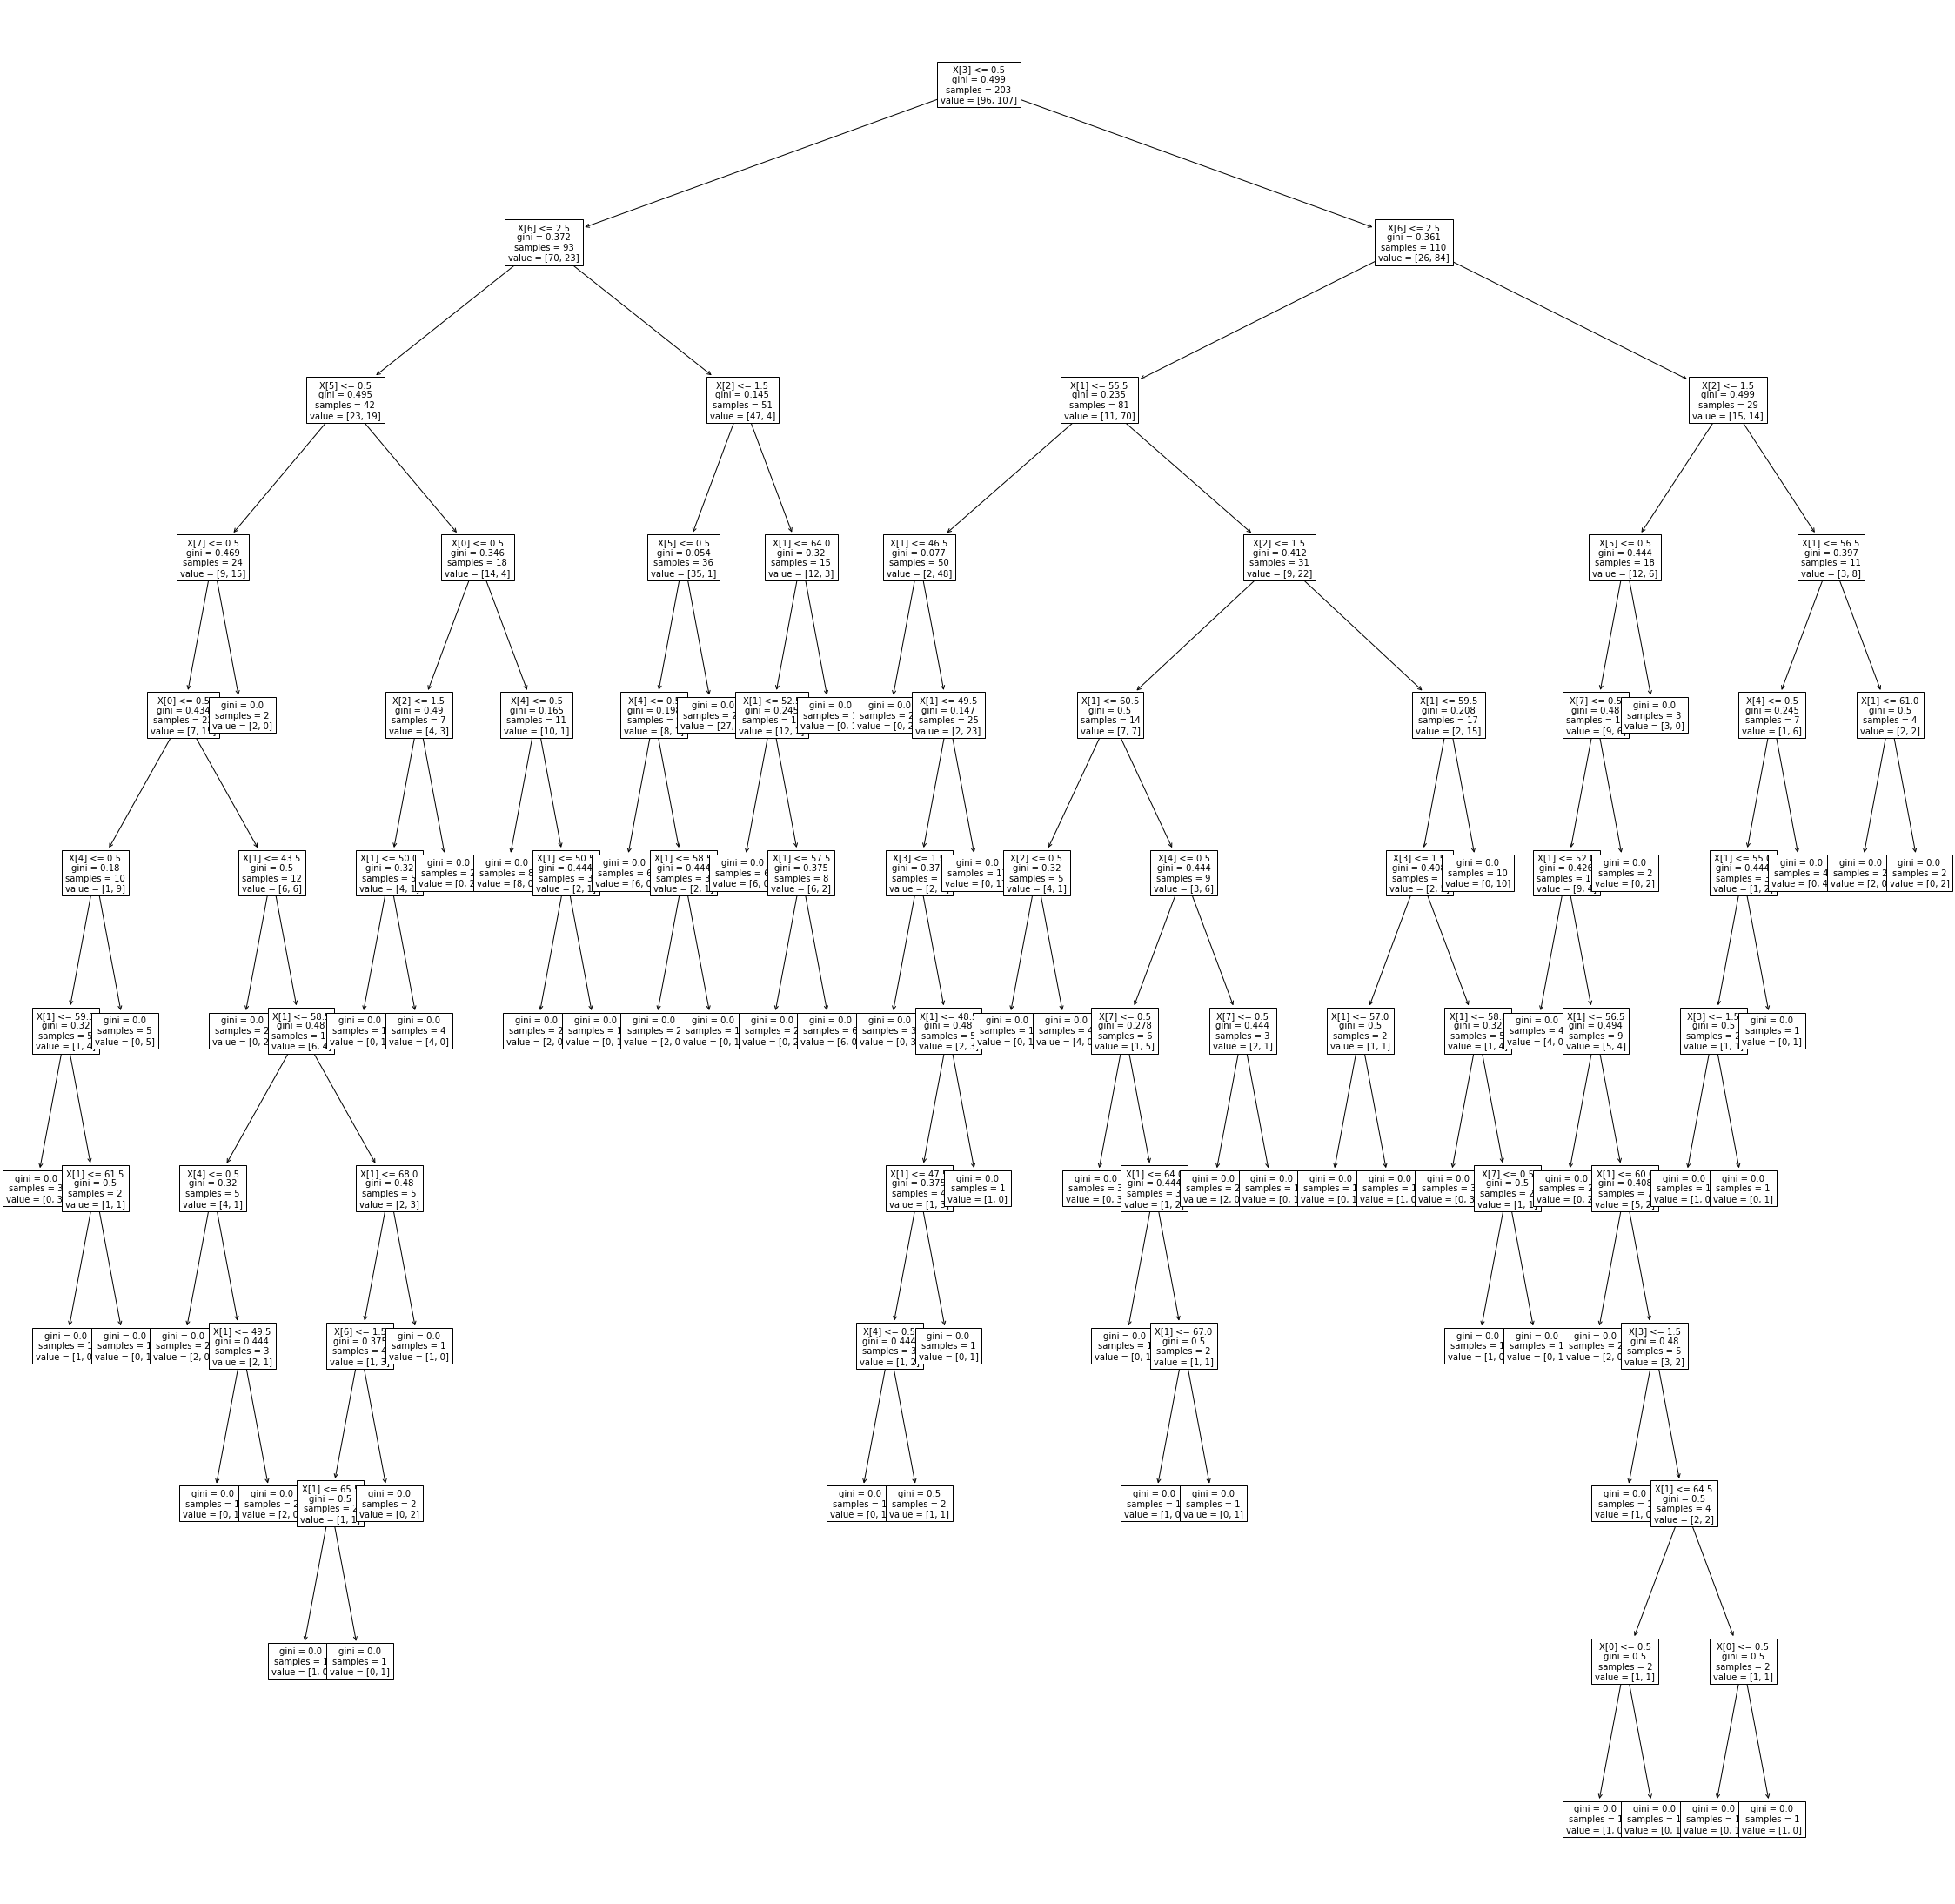

In [60]:
from sklearn import tree

fig, ax = plt.subplots(figsize=(40, 40))
tree.plot_tree(tree_clf, fontsize=10)
plt.show()

In [67]:
from sklearn.tree import export_text

print(export_text(tree_clf, feature_names=tmp_attrs_cat))

|--- cp <= 0.50
|   |--- thal <= 2.50
|   |   |--- exang <= 0.50
|   |   |   |--- fbs <= 0.50
|   |   |   |   |--- sex <= 0.50
|   |   |   |   |   |--- restecg <= 0.50
|   |   |   |   |   |   |--- slope <= 1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- slope >  1.50
|   |   |   |   |   |   |   |--- age <= 57.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- age >  57.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- restecg >  0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- sex >  0.50
|   |   |   |   |   |--- age <= 43.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- age >  43.50
|   |   |   |   |   |   |--- age <= 58.50
|   |   |   |   |   |   |   |--- age <= 45.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- age >  45.50
|   |   |   |   |   |   |   |   |--- age <= 49.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   | 

**Question** Faites une recherche du meilleur arbre de décision en jouant sur les hyperparamètres `max_depth` entre 2 et 10 et `criterion` qui peut être `"gini"` ou  `"entropy"`

In [68]:
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion':['gini','entropy'],
              'max_depth':np.arange(2,11)}

In [69]:
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, verbose=1)

In [70]:
grid.fit(df_X_train[tmp].to_numpy(), df_y_train.to_numpy().reshape(-1,))

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.1s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])},
             verbose=1)

In [71]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [72]:
grid.best_score_

0.7786585365853659

**Question** Afficher l'arbre correspondant au meilleur estimateur.

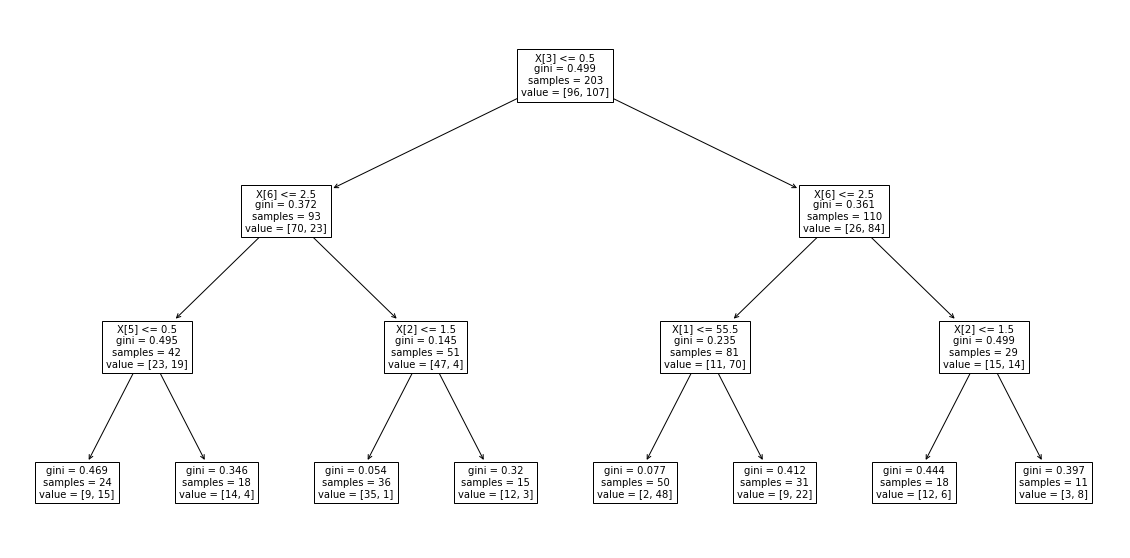

In [73]:
best_tree_clf = grid.best_estimator_
#best_tree_clf.fit(df_X_train[tmp].to_numpy(), df_y_train.to_numpy().reshape(-1,))

fig, ax = plt.subplots(figsize=(20, 10))
tree.plot_tree(best_tree_clf, fontsize=10)
plt.show()

# Régression logistique 

## Observation

In [74]:
from ipywidgets import interact

def logistic_sigmoid(x, a, b):
    return 1 / (1 + np.exp(-(np.dot(a, x) + b))) 

def loss_logistic(x ,a, b):
    return np.log(np.exp(-(np.dot(a, x) + b))+1)

funcs = {"loss":loss_logistic, "sigmoïde": logistic_sigmoid}
grid_size = 0.1
x_grid = np.arange(-5, 5, grid_size)

plt.clf()

def plot_logistic_sigmoid(f, a, b):
    plt.plot(x_grid, funcs[f](x_grid, a, b), '-b')
    plt.axis([-5, 5, 0, 1])
    plt.show()


interact(
    plot_logistic_sigmoid,
    a=(-10, 10, .25),
    b=(-10, 10),
    f=['sigmoïde', 'loss']
)

<Figure size 432x288 with 0 Axes>

interactive(children=(Dropdown(description='f', options=('sigmoïde', 'loss'), value='sigmoïde'), FloatSlider(v…

<function __main__.plot_logistic_sigmoid(f, a, b)>

## Application

**Question** Importer `LogisticRegression` et entraîner un classifieur. Afficher le score. Adaptez le nombre d'itérations...

In [99]:
from sklearn import linear_model

lr = linear_model.LogisticRegression(random_state = 42)

lr_params = dict(logisticregression__n_iter_=1)

#lr.set_params(lr_params)

lr_pred = lr.fit(df_X_train[attrs_cat].to_numpy(), df_y_train.to_numpy().reshape(-1,)).predict(df_X_test[attrs_cat])

print('Mean squared error: %.2f' % mean_squared_error(y_test, lr_pred))
print('Coefficient of determination: %.2f'% r2_score(y_test, lr_pred))
print("score: " + str(lr.score(df_X_test[attrs_cat], y_test)))

Mean squared error: 0.22
Coefficient of determination: 0.10
score: 0.78


**Question** Avec `LogisticRegressionCV` réglez les hyperparamètres. Quelle valeur de $C$ a été trouvée ? 

In [100]:
lrCV = linear_model.LogisticRegressionCV(random_state = 42)
lr_param_grid = {
    'C': [1e-3, 1e-2, 1e-1, 1, 1.001, 1.01, 1.1, 1.2, 1.5, 1.8, 2]
}

model_lr = GridSearchCV(lr, param_grid=lr_param_grid, verbose=1)
lr_pred = model_lr.fit(df_X_train[attrs_cat].to_numpy(), df_y_train.to_numpy().reshape(-1,)).predict(df_X_test[attrs_cat])


print('Mean squared error: %.2f' % mean_squared_error(y_test, lr_pred))
print('Coefficient of determination: %.2f'% r2_score(y_test, lr_pred))
print("best parameters: ", model_lr.best_params_)
print("accuracy: ", model_lr.best_score_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Mean squared error: 0.22
Coefficient of determination: 0.10
best parameters:  {'C': 0.1}
accuracy:  0.8421951219512195


[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.3s finished


## Scaling

Alors que ce n'est pas nécessaire pour les arbres de décision ou NaiveBayes, il pourrait être opportun de normaliser les attributs continus avec d'autres classifieurs...

**Question** Utiliser `StandardScaler` pour normaliser les attributs continus sur le train. Composer alors un nouveau jeu de données `X_train_scaled` avec les attributs continus normalisés et les attributs catégoriels inchangés. On utilisera `fit` pour entrainer la transformation puis `transform` pour l'appliquer au test ensuite... donnant `X_test_scaled`. 

In [160]:
from sklearn.preprocessing import StandardScaler

df_X_train_scaled = df_X_train.copy()
df_X_test_scaled = df_X_test.copy()

for attr in attrs_cont:
    df_X_train_scaled[attr] = StandardScaler(with_mean=0, with_std=1).fit_transform(df_X_train[attr].values.reshape(-1,1))
    df_X_test_scaled[attr] = StandardScaler(with_mean=0, with_std=1).fit_transform(df_X_test[attr].values.reshape(-1,1))
    
print("df_X_train:")
print(df_X_train.head())
    
print("df_X_train_scaled:")
print(df_X_train_scaled.head())

df_X_train:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
37    54    1   2       150   232    0        0      165      0      1.6   
16    58    0   2       120   340    0        1      172      0      0.0   
126   47    1   0       112   204    0        1      143      0      0.1   
291   58    1   0       114   318    0        2      140      0      4.4   
273   58    1   0       100   234    0        1      156      0      0.1   

     slope  ca  thal  
37       2   0     3  
16       2   0     2  
126      2   0     2  
291      0   3     1  
273      2   1     3  
df_X_train_scaled:
          age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
37   6.001612    1   2  8.808237  4.227662    0        0  7.295554      0   
16   6.446176    0   2  7.046590  6.195711    0        1  7.605062      0   
126  5.223625    1   0  6.576817  3.717426    0        1  6.322813      0   
291  6.446176    1   0  6.694260  5.794812    0        2  6.190167

**Question** Réentraîner le classifieur par régression logistique avec ce nouveau jeu de données et estimer les scores.

In [167]:
lr_scaled = linear_model.LogisticRegression(random_state = 42)

lr_scaled.fit(df_X_train_scaled.to_numpy(), df_y_train.to_numpy().reshape(-1,))
lr_scaled_pred = lr_scaled.predict(df_X_test_scaled.to_numpy()).reshape(-1,1)

print('Mean squared error: %.2f' % mean_squared_error(y_test, lr_scaled_pred))
print('Coefficient of determination: %.2f'% r2_score(y_test, lr_scaled_pred))
print("score: " + str(lr_scaled.score(df_X_test_scaled.to_numpy(), lr_scaled_pred)))

Mean squared error: 0.20
Coefficient of determination: 0.18
score: 1.0


# SVC...

**Question** Même si cela n'a pas été étudié en cours... on peut aussi utiliser le classifieur `SVC` (voir [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)) 

In [163]:
from sklearn.svm import SVC

In [164]:
clf_svc = SVC(gamma='auto')
clf_svc.fit(df_X_train_scaled.to_numpy(), df_y_train.to_numpy().reshape(-1,))
svc_pred = clf_svc.predict(df_X_test_scaled.to_numpy()).reshape(-1,1)

In [165]:
print('Mean squared error: %.2f' % mean_squared_error(y_test, svc_pred))
print('Coefficient of determination: %.2f'% r2_score(y_test, svc_pred))
print("score: " + str(lr_scaled.score(df_X_test_scaled.to_numpy(), svc_pred)))

Mean squared error: 0.22
Coefficient of determination: 0.10
score: 0.94
